In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
df= keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
(X_train,y_train),(X_test,y_test)=df

In [4]:
print("Number of images in train dataset",len(X_train))
print("Number of images in test dataset",len(X_test))


Number of images in train dataset 60000
Number of images in test dataset 10000


In [5]:
print("Shape of each image in pixels",X_train[0].shape)

Shape of each image in pixels (28, 28)


In [6]:
labels=pd.Series(y_train) 

The digits are:


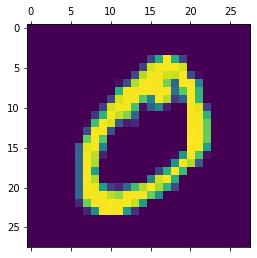

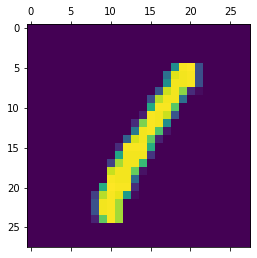

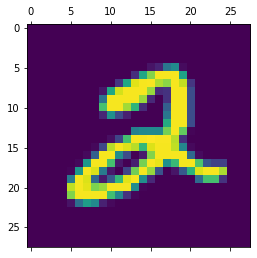

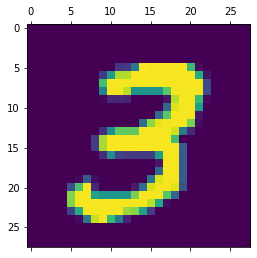

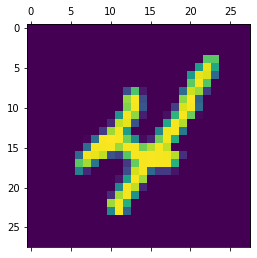

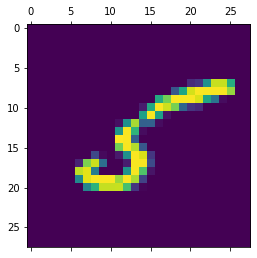

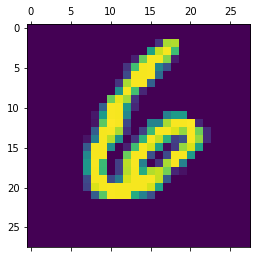

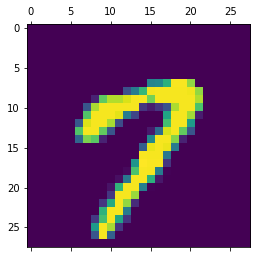

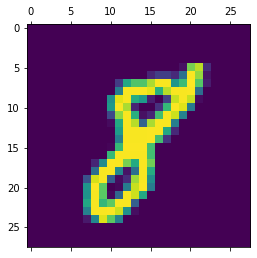

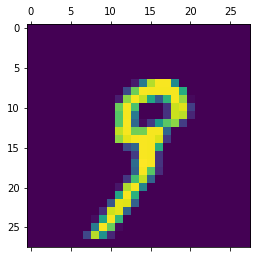

In [7]:
print("The digits are:")
a=[0,1,2,3,4,5,6,7,8,9]
j=0
for i in range(0,20):
  if(y_train[i]==a[j]):
    j=j+1
    plt.matshow(X_train[i])
  elif(j==10):
   break

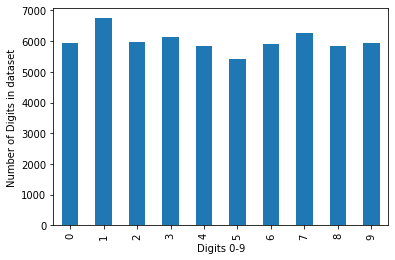

In [8]:
labels.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Digits 0-9")
plt.ylabel("Number of Digits in dataset")
plt.show()

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\n Reached 99% accuracy so cancelling training")
      self.model.stop_training = True
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train=X_train.reshape(60000,28,28,1)
X_train=X_train/255.0
X_test=X_test.reshape(10000,28,28,1)
X_test=X_test/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation='sigmoid'),
  tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

test_loss, test_acc = model.evaluate(X_test,y_test)
print(test_acc)


Epoch 1/5
1875/1875 [==============================] - 37s 3ms/step - loss: 0.1332 - accuracy: 0.9627
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0408 - accuracy: 0.9880
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0263 - accuracy: 0.9921
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0183 - accuracy: 0.9946
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0244 - accuracy: 0.9924
0.9923999905586243
